# Data Collection and Preprocessing

by Harman Singh

## 0. Configurations

In [48]:
import warnings

## 1. Import libraries and data

In [49]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

# CSV datasets
df = pd.read_csv("./data/food_coded.csv")

## 2. Survey the data

### **General dataset information**

In [50]:
df.index

RangeIndex(start=0, stop=125, step=1)

In [51]:
df.columns

Index(['GPA', 'Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food', 'comfort_food_reasons',
       'comfort_food_reasons_coded', 'cook', 'comfort_food_reasons_coded.1',
       'cuisine', 'diet_current', 'diet_current_coded', 'drink',
       'eating_changes', 'eating_changes_coded', 'eating_changes_coded1',
       'eating_out', 'employment', 'ethnic_food', 'exercise',
       'father_education', 'father_profession', 'fav_cuisine',
       'fav_cuisine_coded', 'fav_food', 'food_childhood', 'fries', 'fruit_day',
       'grade_level', 'greek_food', 'healthy_feeling', 'healthy_meal',
       'ideal_diet', 'ideal_diet_coded', 'income', 'indian_food',
       'italian_food', 'life_rewarding', 'marital_status',
       'meals_dinner_friend', 'mother_education', 'mother_profession',
       'nutritional_check', 'on_off_campus', 'parents_cook', 'pay_meal_out',
       'persian_food', 'self_perception_weight', 'soup', 'sports', 'thai_food',
       

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

In [53]:
df.describe()

,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,...,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,veggies_day,vitamins,waffle_calories
count,125.000000,125.000000,125.000000,106.000000,124.000000,125.00000,106.000000,122.000000,125.000000,108.000000,...,124.000000,124.000000,124.000000,123.000000,125.000000,124.000000,125.000000,125.000000,125.000000,125.000000
mean,1.392000,1.112000,577.320000,3.028302,505.241935,1.75200,2.698113,2.786885,2.688000,1.388889,...,2.806452,3.120968,1.217742,1.390244,3.336000,947.580645,555.040000,4.008000,1.512000,1073.400000
std,0.490161,0.316636,131.214156,0.639308,230.840506,0.43359,1.972042,1.038351,1.910987,0.974759,...,1.423824,1.115980,0.414385,0.489800,1.436528,202.090179,152.370379,1.081337,0.501867,248.667092
min,1.000000,1.000000,265.000000,2.000000,315.000000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,580.000000,345.000000,1.000000,1.000000,575.000000
25%,1.000000,1.000000,430.000000,3.000000,420.000000,2.00000,2.000000,2.000000,2.000000,1.000000,...,2.000000,2.000000,1.000000,1.000000,2.000000,725.000000,500.000000,3.000000,1.000000,900.000000
50%,1.000000,1.000000,610.000000,3.000000,420.000000,2.00000,2.000000,3.000000,2.000000,1.000000,...,3.000000,3.000000,1.000000,1.000000,3.000000,940.000000,500.000000,4.000000,2.000000,900.000000
75%,2.000000,1.000000,720.000000,3.000000,420.000000,2.00000,3.000000,3.000000,3.000000,1.000000,...,4.000000,4.000000,1.000000,2.000000,5.000000,1165.000000,690.000000,5.000000,2.000000,1315.000000
max,2.000000,2.000000,720.000000,4.000000,980.000000,2.00000,9.000000,5.000000,9.000000,6.000000,...,5.000000,6.000000,2.000000,2.000000,5.000000,1165.000000,850.000000,5.000000,2.000000,1315.000000


### **Missing Values**

Create DataFrame of missing values per feature

In [54]:
missing_values = df.isnull().sum()
missing_df = pd.DataFrame({'feature': missing_values.index, 'missing': missing_values.values}) \
    .reset_index(drop=True) \
    .sort_values(by="missing", ascending=False)

only retain features that have missing values

In [55]:
missing_df = missing_df[missing_df["missing"] > 0]

In [56]:
missing_df.head()

,feature,missing
56,type_sports,26
4,calories_day,19
9,comfort_food_reasons_coded,19
12,cuisine,17
22,exercise,13


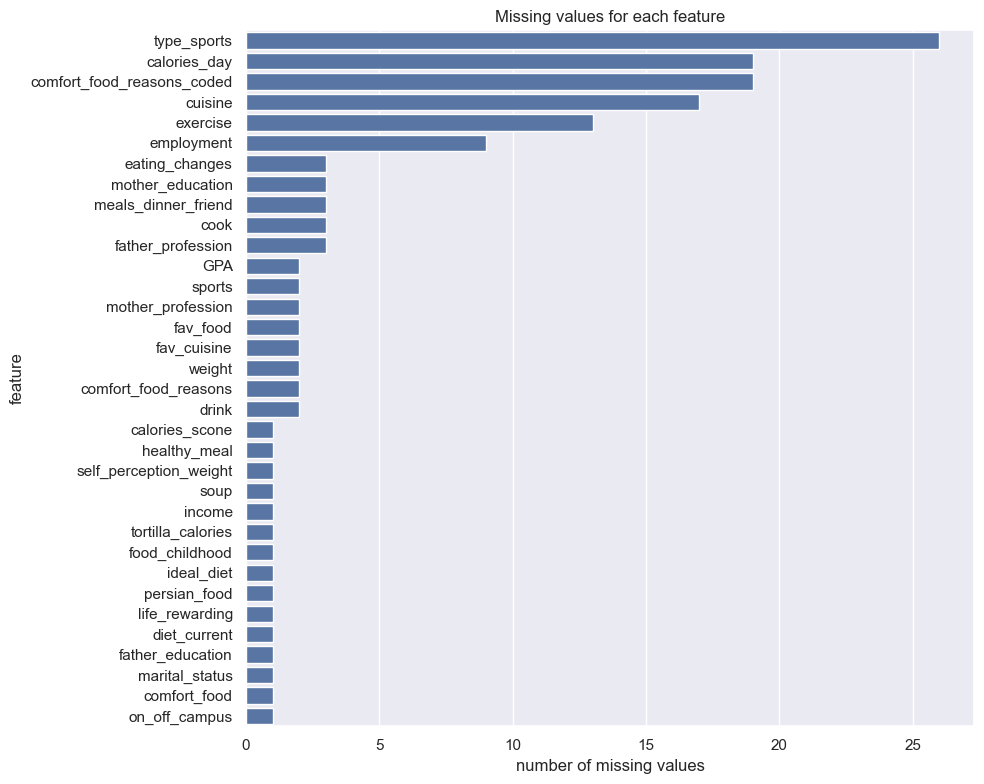

In [57]:
plt.figure(figsize=(10, 8))
sns.barplot(missing_df, x="missing", y="feature")
plt.title("Missing values for each feature")
plt.xlabel("number of missing values")
plt.tight_layout()
plt.show()

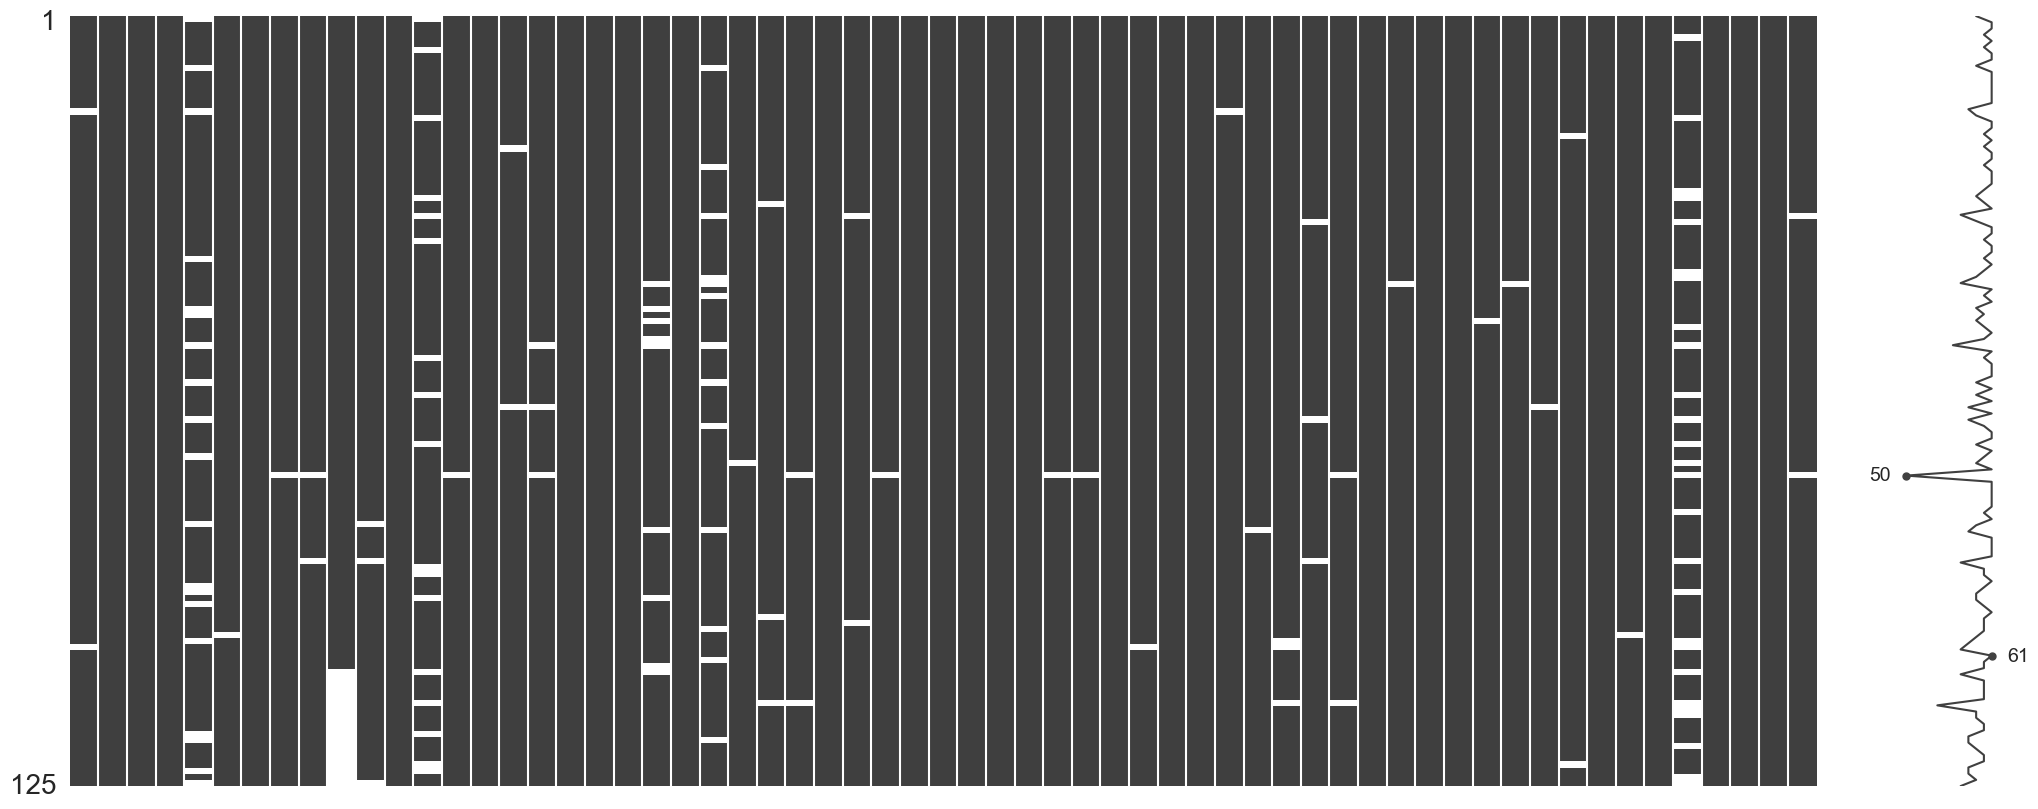

In [58]:
import missingno as msno
msno.matrix(df)
plt.show()

### **Correlation**

Get all numerical columns

In [59]:
numerical_columns = df.select_dtypes(include=[np.number]).columns
numerical_columns

Index(['Gender', 'breakfast', 'calories_chicken', 'calories_day',
       'calories_scone', 'coffee', 'comfort_food_reasons_coded', 'cook',
       'comfort_food_reasons_coded.1', 'cuisine', 'diet_current_coded',
       'drink', 'eating_changes_coded', 'eating_changes_coded1', 'eating_out',
       'employment', 'ethnic_food', 'exercise', 'father_education',
       'fav_cuisine_coded', 'fav_food', 'fries', 'fruit_day', 'grade_level',
       'greek_food', 'healthy_feeling', 'ideal_diet_coded', 'income',
       'indian_food', 'italian_food', 'life_rewarding', 'marital_status',
       'mother_education', 'nutritional_check', 'on_off_campus',
       'parents_cook', 'pay_meal_out', 'persian_food',
       'self_perception_weight', 'soup', 'sports', 'thai_food',
       'tortilla_calories', 'turkey_calories', 'veggies_day', 'vitamins',
       'waffle_calories'],
      dtype='object')

Create correlation matrix

In [60]:
corr_matrix = df[numerical_columns].corr()

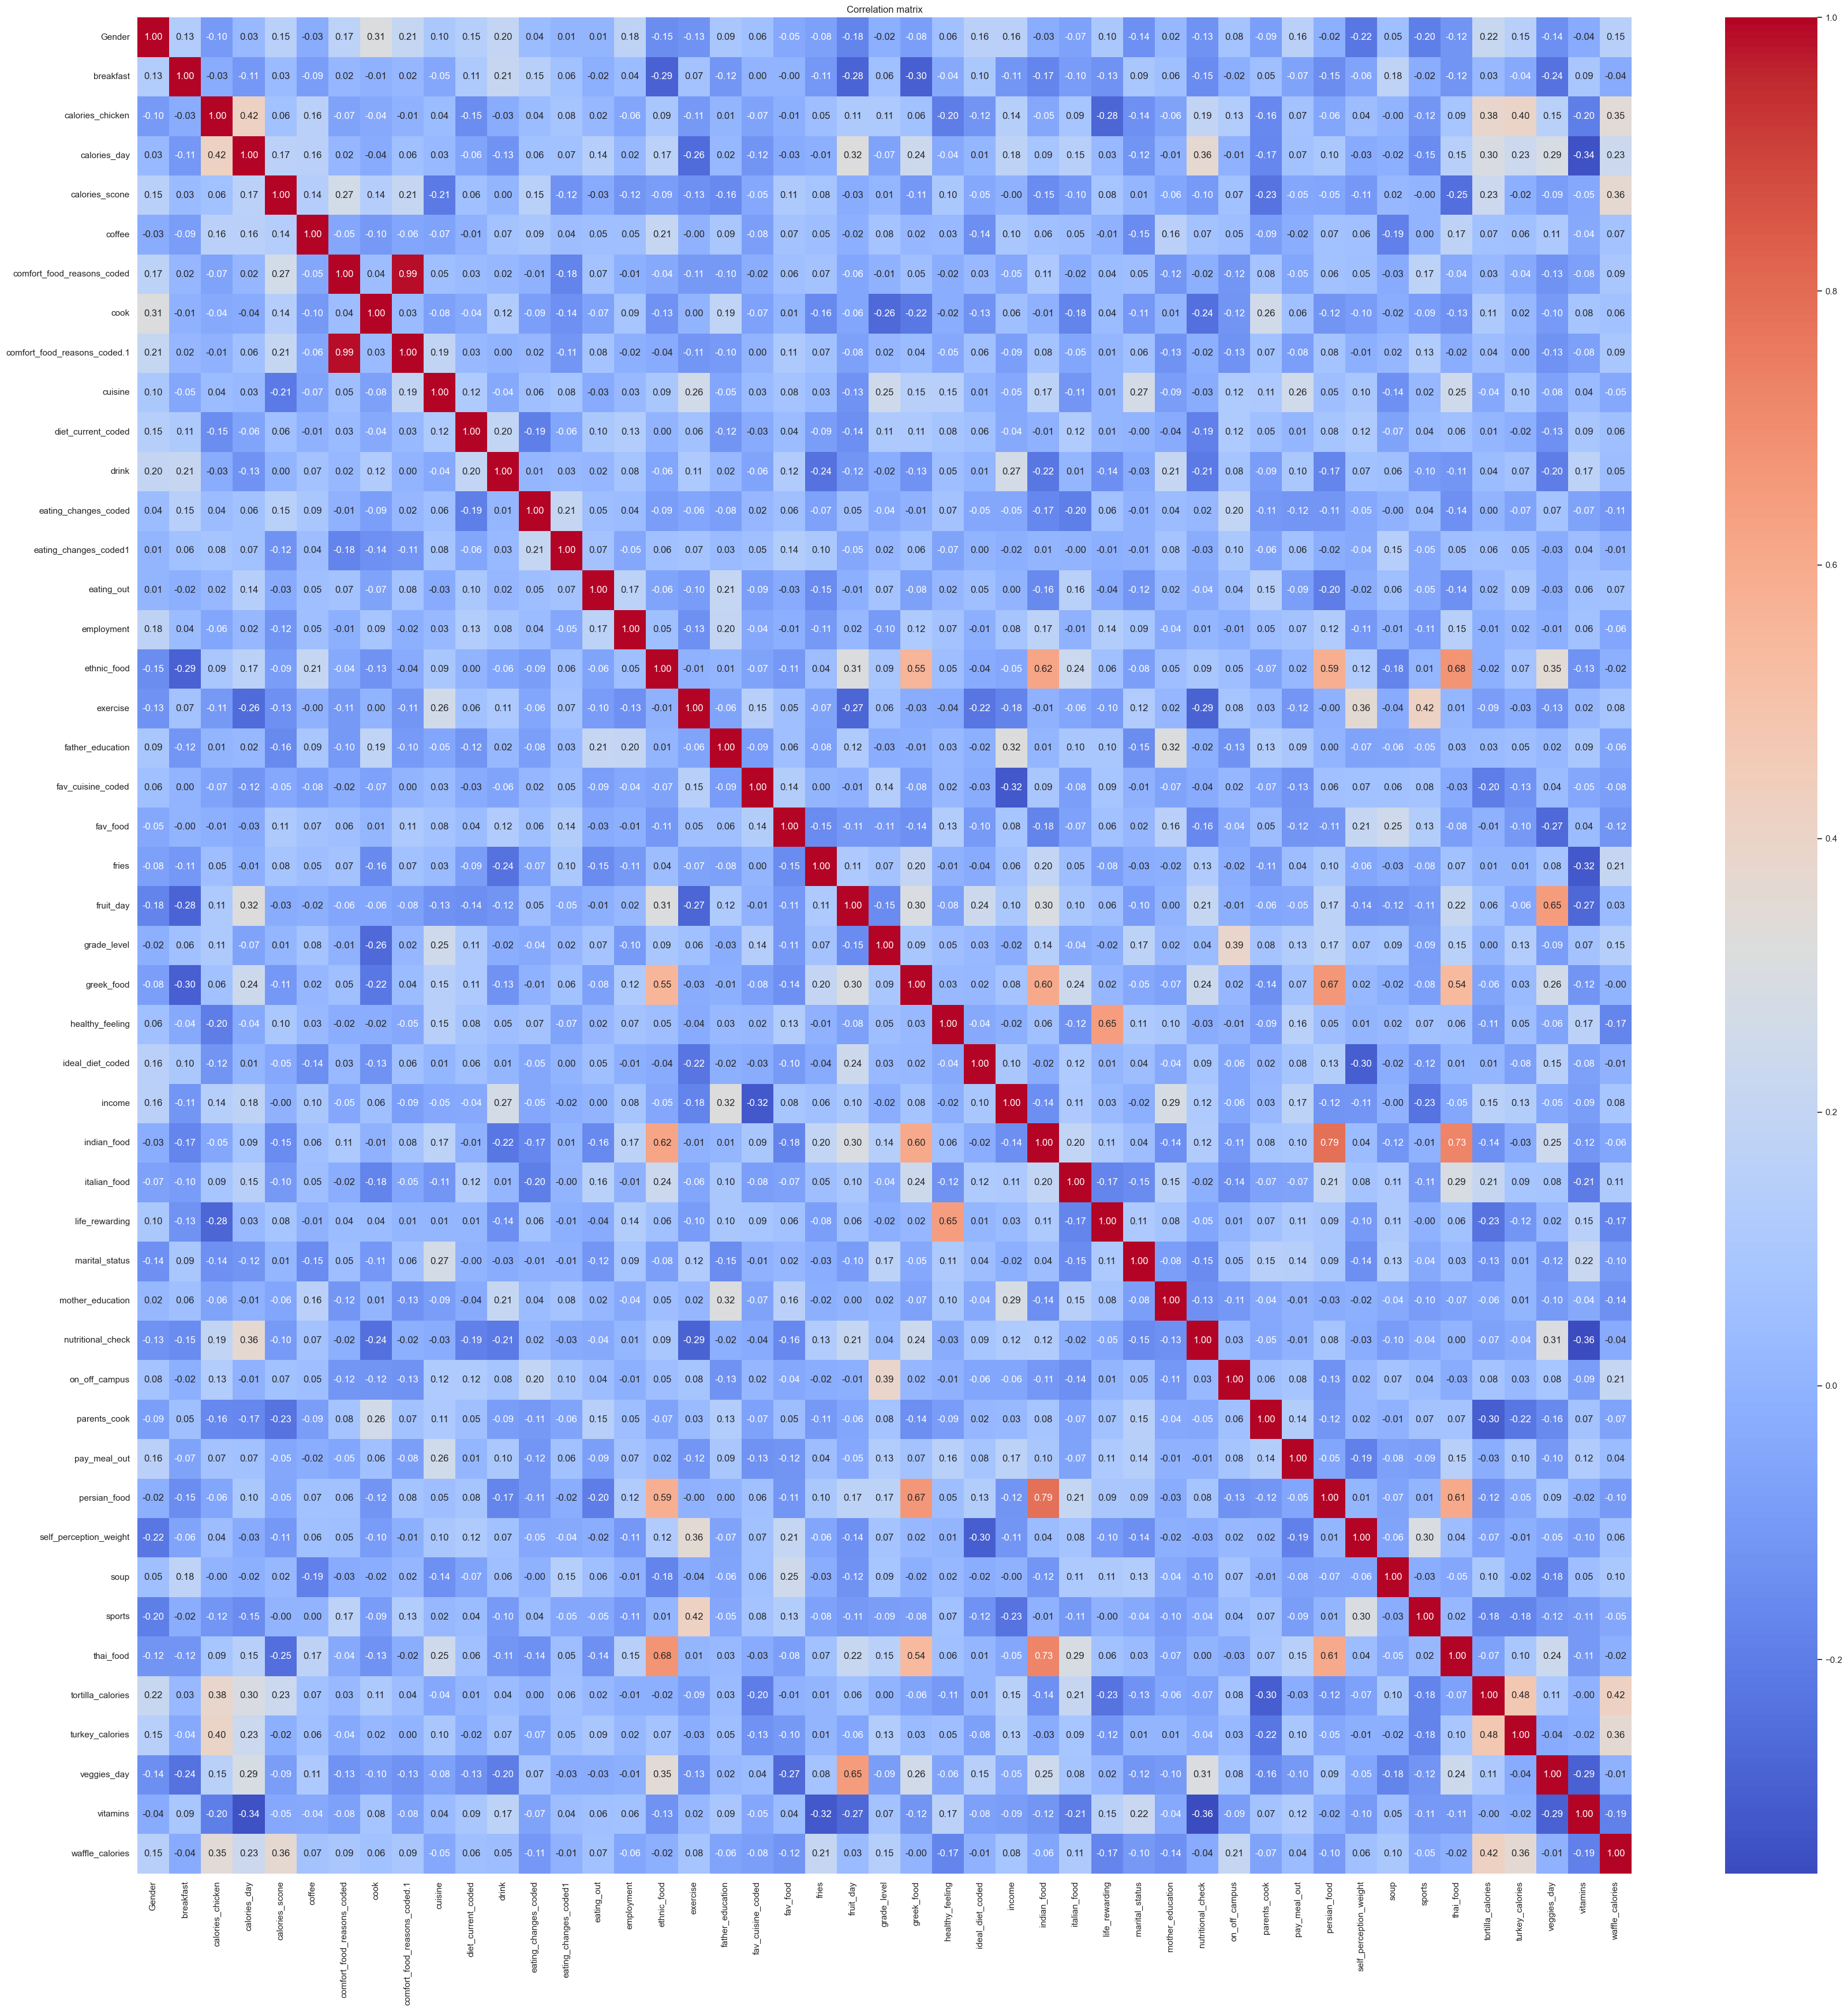

In [61]:
plt.figure(figsize=(35, 35))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()

### **Distribution**

Seperating numerical columns from categorical columns (to visualize distributions better). Some columns only contained a few unique values, and are better plotted as categorical instead of numerical. While some categorical columns had more than 5 unique values (these are open answers, and cannot be plotted)

In [62]:
unique_values = df.nunique()
columns_with_less_than_5_unique_values = unique_values[unique_values <= 5].index.tolist()

In [63]:
for col in columns_with_less_than_5_unique_values:
    df[col] = df[col].astype("category")


numerical_columns = df.select_dtypes(include="number").columns
categorical_columns = df.select_dtypes(include="category").columns
object_columns = df.select_dtypes(include="object").columns            # not plottable

Checking if every column was assigned to either **numerical_columns** or **categorical_columns** (or object_columns).

In [67]:
len(df.columns) == (
    len(numerical_columns) \
    + len(categorical_columns) \
    + len(object_columns))

True

#### Numerical columns

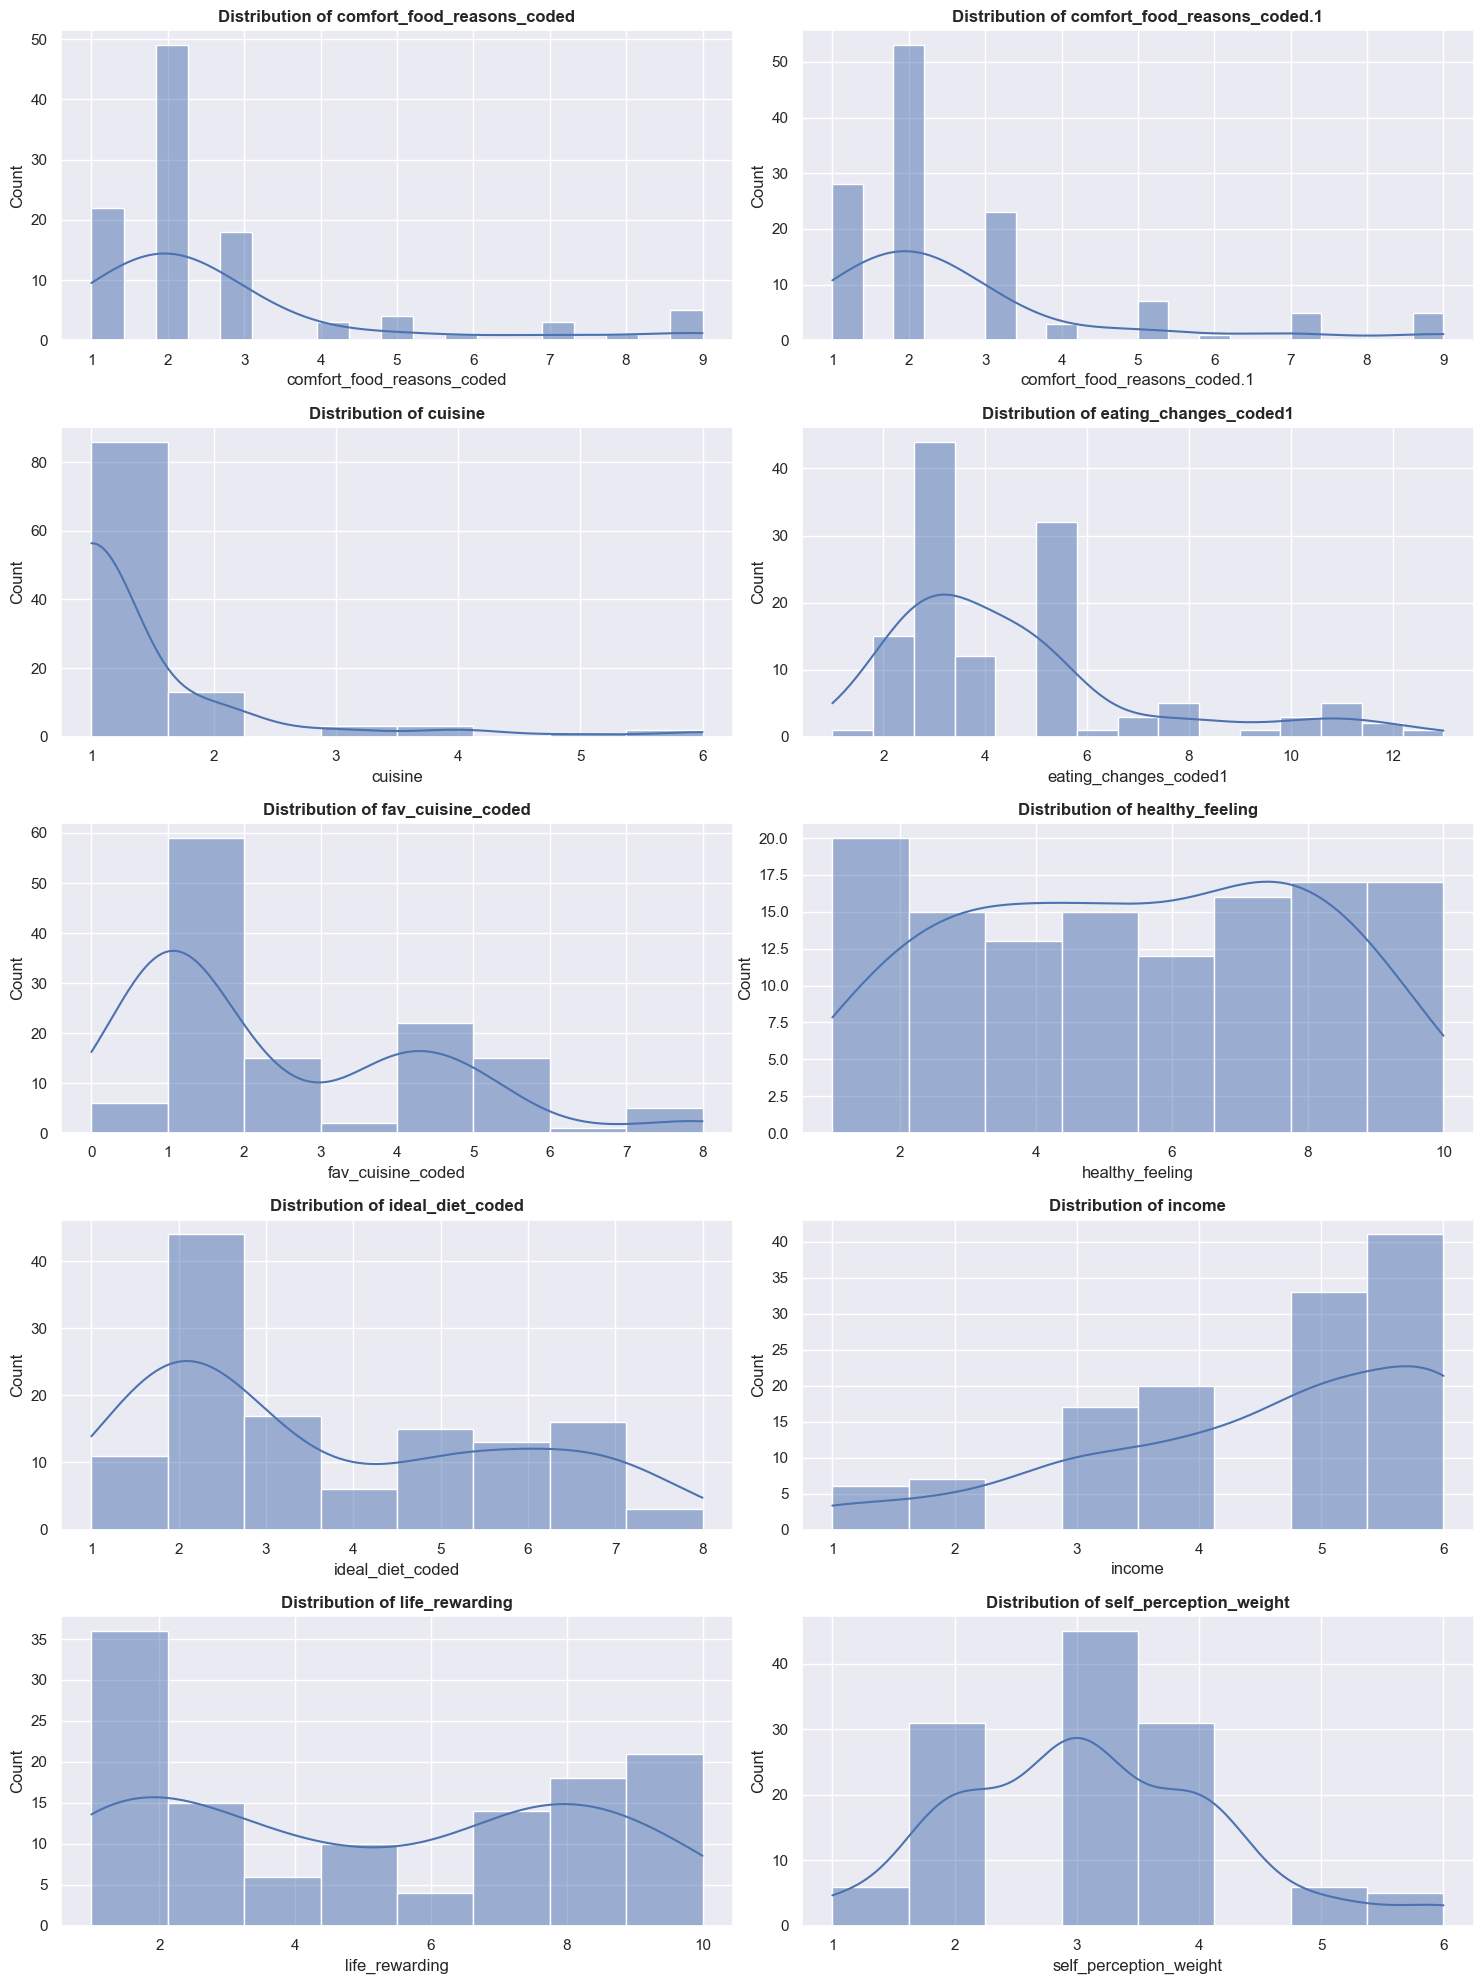

In [65]:
plt.figure(figsize=(15, 20))

for i, column in enumerate(numerical_columns):
    plt.subplot(len(numerical_columns)//2 + len(numerical_columns)%2, 2, i+1)
    sns.histplot(df[column], kde=True)
    plt.title(f"Distribution of {column}", fontweight="bold")

plt.tight_layout()
plt.show()

#### Categorical columns

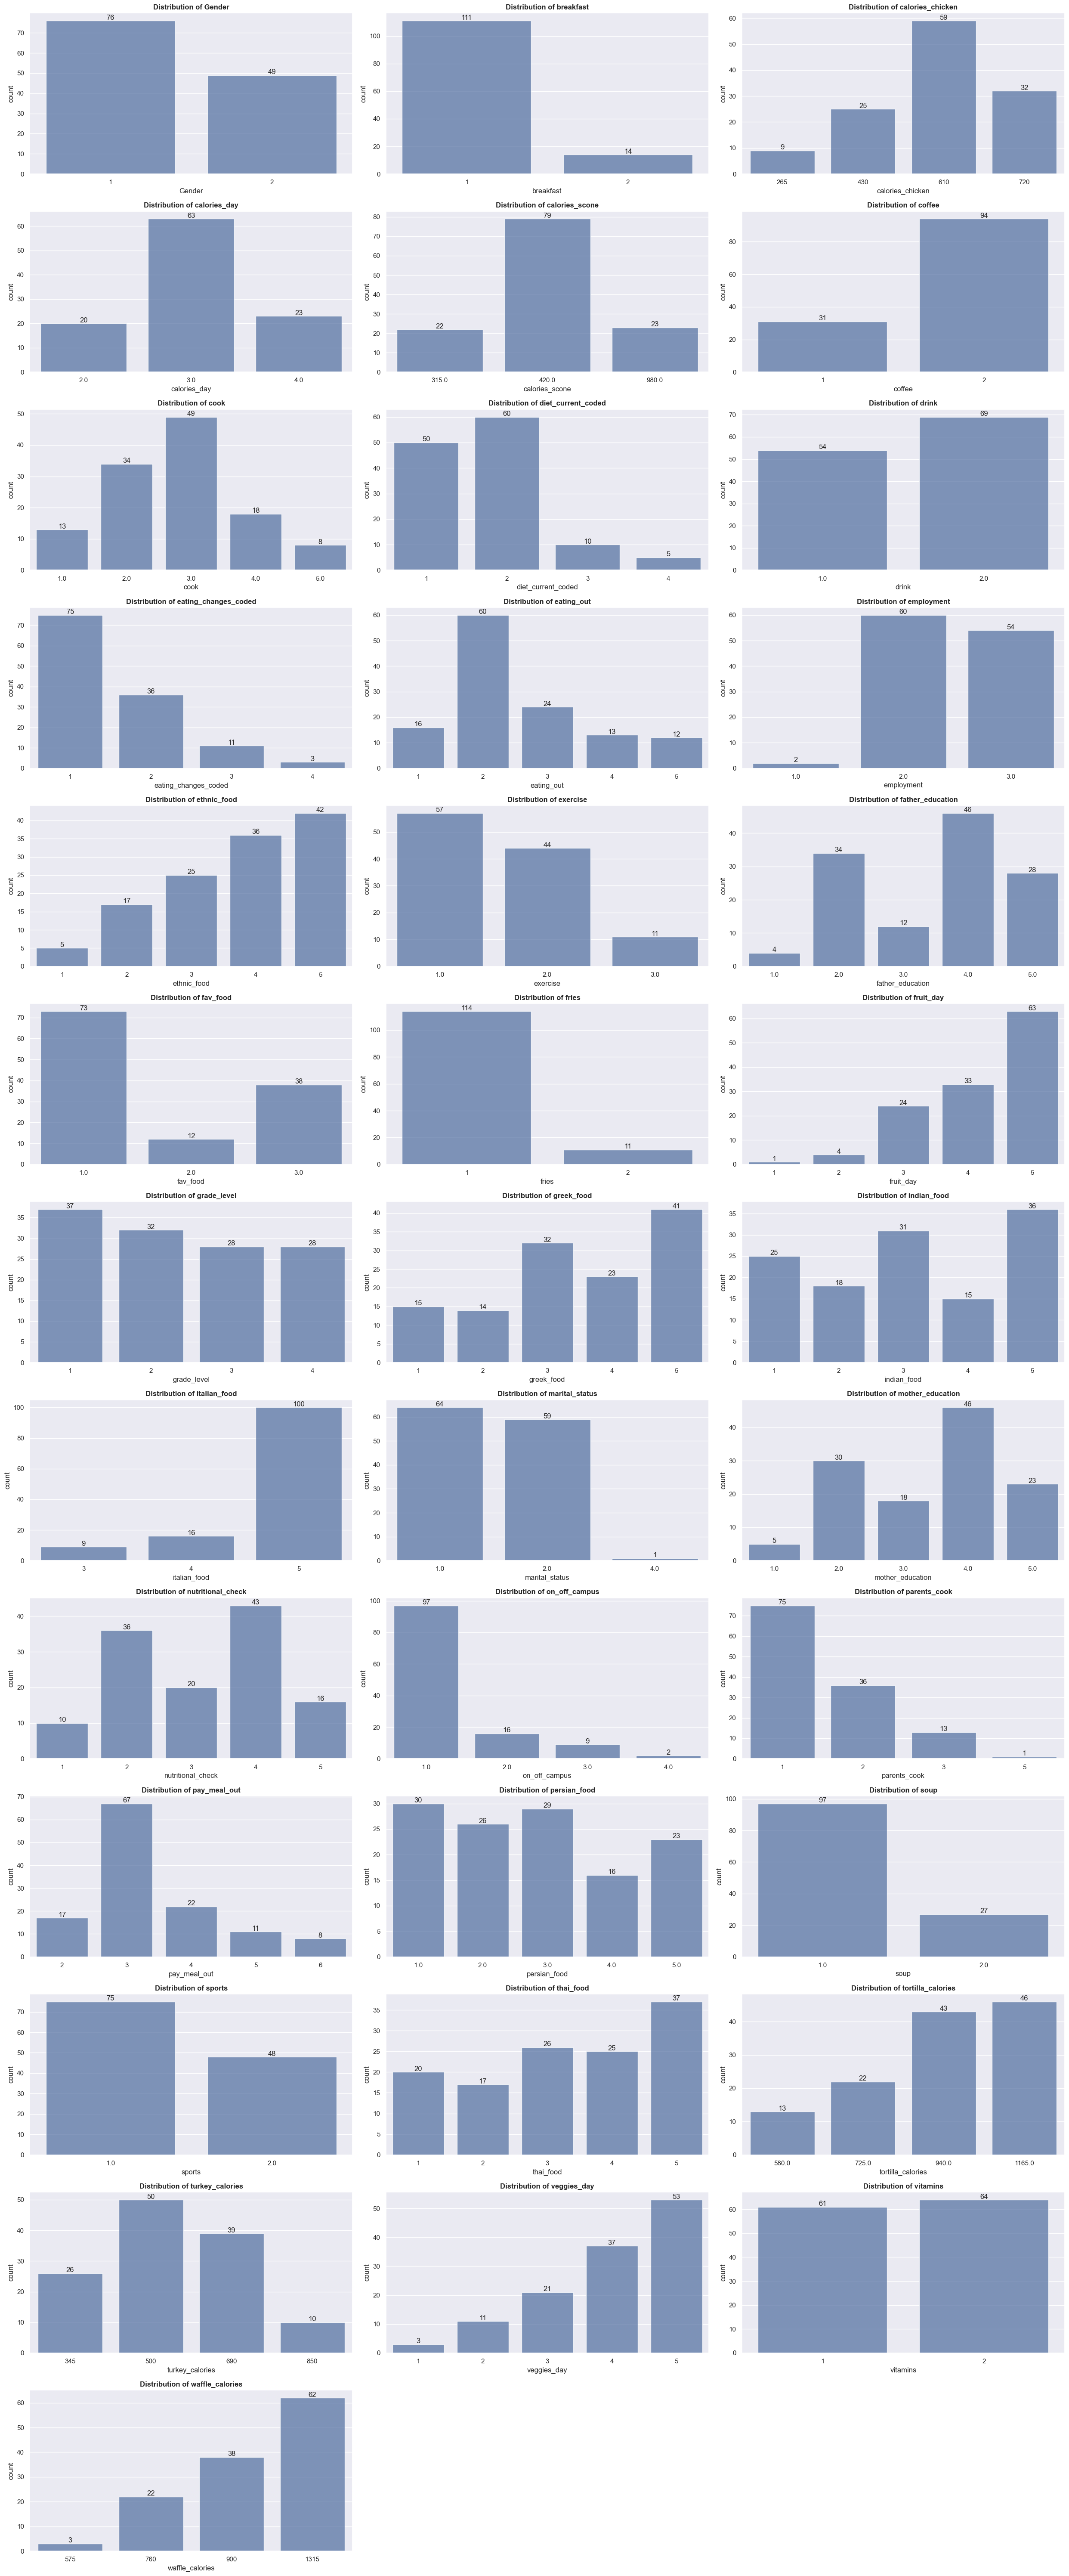

In [66]:
plt.figure(figsize=(25, 60))

for i, column in enumerate(categorical_columns):
    plt.subplot(len(categorical_columns)//3 + len(categorical_columns)%3, 3, i+1)
    ax = sns.countplot(data=df, x=df[column], alpha=0.75)
    plt.title(f"Distribution of {column}", fontweight="bold")

    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 5),
                    textcoords = 'offset points')

plt.tight_layout()
plt.show()